In [1]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [2]:
#df=pd.read_csv('./c694/goossens_raw.csv')
df=pd.read_csv('./goossens_raw.csv')
df

,SG,TBP(K),MW
0,0.6310,306,76
1,0.7135,372,99
2,0.7205,365,96
3,0.7293,373,100
4,0.6786,329,82
...,...,...,...
65,0.7054,367,95
66,0.6315,309,72
67,0.8842,353,78
68,1.1762,612,178


We have 3 variables:

|Variable|Description|Designation|
|---|---|---|
|$Mw$|Molecular Mass|dependent|
|$SG$|Specific Gravity|independent|
|$TBP$|True Boiling Point|independent|

We can designate any one of the three as dependent, but as the molecular mass is the most difficult to measure, we'll chose it.

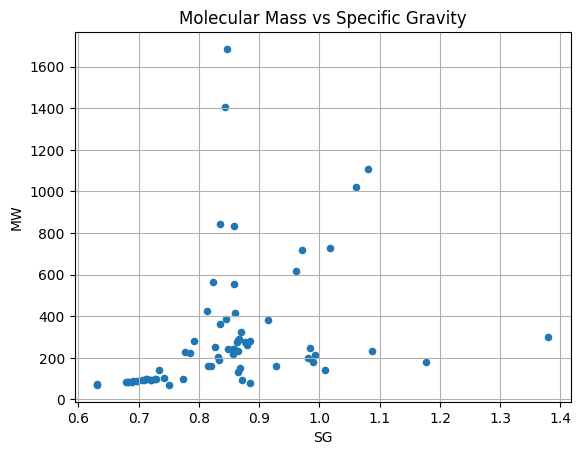

In [3]:
df.plot(kind='scatter',x='SG',y='MW')
plt.title("Molecular Mass vs Specific Gravity")
plt.grid()
plt.show()

Although there appears to be a clear linear relationship between molecular mass and specific gravity at low gravity numbers, the heteroscedasticity explodes above a gravity of about 0.75.

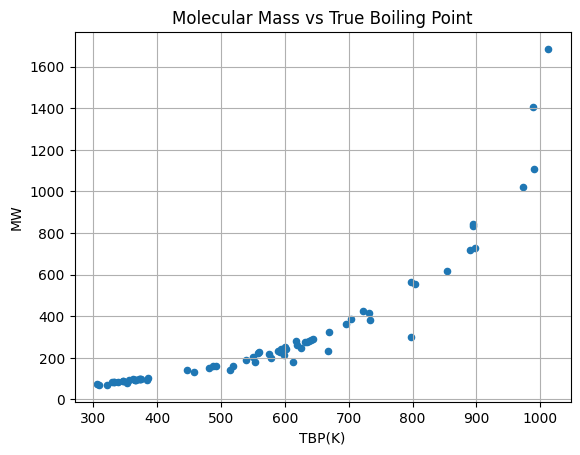

In [4]:
df.plot(kind='scatter',x='TBP(K)',y='MW')
plt.title("Molecular Mass vs True Boiling Point")
plt.grid()
plt.show()

There seems to be a monotonically increasing relationship between molecular mass and true boiling point, with a possible "pole" around the boiling point of 1000.

At this point, it may be tempting to ignore the effect of specific gravity on the prediction of molecular mass.

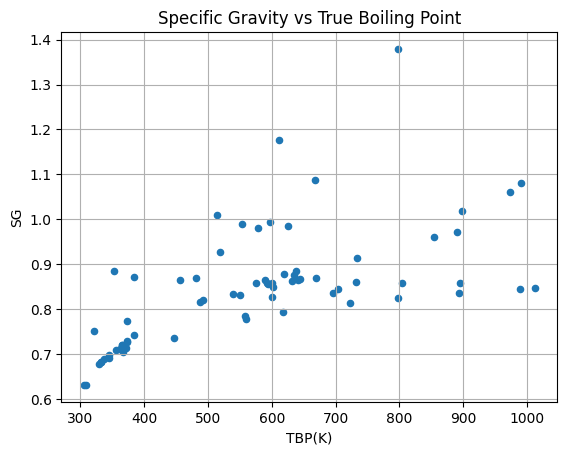

In [5]:
df.plot(kind='scatter',x='TBP(K)',y='SG')
plt.title("Specific Gravity vs True Boiling Point")
plt.grid()
plt.show()

This plot suggests that there is very little correlation between specific gravity and true boiling point, except maybe at low values of boiling point.  Lets test this:

In [6]:
c_sg_tbp=np.corrcoef(df['SG'],df['TBP(K)'])
print(c_sg_tbp)

[[1.         0.62521831]
 [0.62521831 1.        ]]


## Existing Correlations
There are many correlations available for estimating molecular mass from true boiling point and specific gravity.  Here are a few of them using the following nomenclature:

|Symbol|Meaning|
|---|---|
|$M_w$|Apparent Molecular Mass|
|$T_b$|Boiling Point Temperature at Atmospheric Pressure|
|$\gamma$|Specific Gravity (density compared to water)|
|$a_{00}..a_{09}$|Empirical Constants|
|$K_w$|Characterization factor (intermediate value)|
|$X_0...X_3$|Intermediate Variables|

### Hariu & Sage (1969)
${M} _ {w} = {a} _ {00} + {a} _ {01} {K} _ {w} + {a} _ {02} {K} _ {w} ^ {2} + {a} _ {03} {T} _ {b} {K} _ {w} + {a} _ {04} {T} _ {b} {K} _ {w} ^ {2} + {a} _ {05} {T} _ {b} ^ {2} {K} _ {w} + {a} _ {06} {T} _ {b} ^ {2} {K} _ {w} ^ {2}$

${K} _ {w} =\frac {\sqrt [3] {{T} _ {b}}}  {\gamma}$

### Kesler & Lee (1976)
${M} _ {w} = {X} _ {0} + \frac{{X} _ {1}}  {{T} _ {b}} + \frac{{X} _ {2}}  {{T} _ {b} ^ {2}}$

${X} _ {0} = {a} _ {00} + {a} _ {01} γ+ \left ({a} _ {02} + {a} _ {03} γ \right ) {T} _ {b}$

${X} _ {1} = \left (1+ {a} _ {04} γ+ {a} _ {05} {γ} ^ {2} \right ) \left ({a} _ {06} + \frac{{a} _ {07}}  {{T} _ {b}} \right ) \cdot {10} ^ {7}$

${X} _ {2} = \left (1+ {a} _ {08} γ+ {a} _ {09} {γ} ^ {2} \right ) \left ({a} _ {10} + \frac{{a} _ {11}}  {{T} _ {b}} \right ) \cdot {10} ^ {12}$

### American Petroleum Institute (1977)
${M} _ {w} = {a} _ {00} {e} ^ {\left ({a} _ {01} {T} _ {b} \right )} {e} ^ {\left ({a} _ {02} γ \right )} {T} _ {b} ^ {{a} _ {03}} {γ} ^ {{a} _ {04}}$

### Winn, Sim & Daubert (1980)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}}$

### Riazi & Daubert (1980)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}}$

### Rao & Bardon (1985)
$ln {{M} _ {w}} = \left ({a} _ {00} + {a} _ {01} {K} _ {w} \right ) ln {\left (\frac{{T} _ {b}}  {{a} _ {02} + {a} _ {03} {K} _ {w}} \right )}$

### Riazi & Daubert (1987)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{a} _ {01}} {γ} ^ {{a} _ {02}} {e} ^ {\left ({a} _ {03} {T} _ {b} + {a} _ {04} γ+ {a} _ {05} {T} _ {b} γ \right )}$

### Goossens (1996)
${M} _ {w} = {a} _ {00} {T} _ {b} ^ {{X} _ {0}}$

${X} _ {0} =\frac {{a} _ {03} + {a} _ {04} ln {\left (\frac{{T} _ {b}}  {{a} _ {05} - {T} _ {b}} \right )}}  {{a} _ {01} γ + {a} _ {02}}$

### Linan (2011)
${M} _ {w} = {a} _ {00} {e} ^ {\left ({a} _ {01} {T} _ {b} \right )} {e} ^ {\left ({a} _ {02} γ \right )} {T} _ {b} ^ {{a} _ {03}} {γ} ^ {{a} _ {04}}$

### Hosseinifar & Shahverdi (2021)
${M} _ {w} = {\left [{a} _ {00} {T} _ {b} ^ {{a} _ {01}} {\left (\frac{3+2γ} {3-γ} \right )} ^ {\frac{{a} _ {02}} {2}} + {a} _ {03} {T} _ {b} ^ {{a} _ {04}} {\left (\frac{3+2γ} {3-γ} \right )} ^ {\frac{{a} _ {05}} {2}} \right ]} ^ {{a} _ {06}}$

### Stratiev (2022)
${M} _ {w} = {a} _ {00} + {a} _ {01} {e} ^ {\left [{a} _ {02} {e} ^ {\left ({a} _ {03} \frac{{T} _ {b} ^ {{a} _ {06}}} {{γ} ^ {{a} _ {05}}} \right )} \right ]}$
